#Text classiicatin using Naive Bayes

In [1]:
#loading the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
#defining all the categories
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey',
              'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns',
              'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
#training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)
#testing the data on these categories
test = fetch_20newsgroups(subset='test', categories=categories)
#printing the training data
print(train.data[5])
#this will print the artical

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
#importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline
#creating a model based on multinomial naive bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#training the model with the train data
model.fit(train.data, train.target)
#creating labels for the test data
labels = model.predict(test.data)

Text(89.133125, 0.5, 'predicted label')

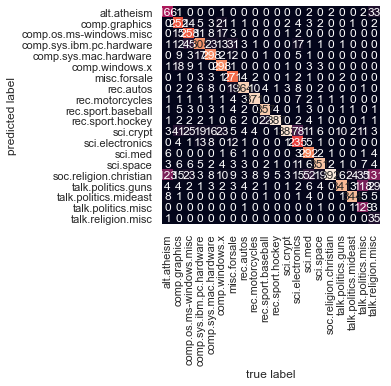

In [12]:
#creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
             , xticklabels=train.target_names
             , yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
#predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [14]:
predict_category('jesus christ')

'soc.religion.christian'

In [15]:
predict_category('sending load to international space station')

'sci.space'

In [17]:
predict_category('bmw is better than audi')

'rec.autos'

In [18]:
predict_category('president of india')

'talk.politics.misc'